# WELCOME
Notebook by: Engr. Umar Zubairi

<img src="images\wrench no bg.png" width=200 height=356 style="display: block; margin-left: auto; margin-right: auto;">


# ME/CFS vs Depression Classification

A synthetic dataset for differential diagnosis between ME/CFS and depression

### About Dataset
ME/CFS vs Depression Dataset
Welcome to a synthetic dataset designed for classification tasks between Myalgic Encephalomyelitis / Chronic Fatigue Syndrome (ME/CFS) and Depression.
This is the first dataset of its kind created specifically to help beginners and researchers explore complex cases of differential diagnosis in mental and chronic health conditions.

### Objective 
Predict whether a patient has:
- ME/CFS
- Depression
- Or both (Both)

### FILE : `me_cfs_vs_depression_dataset.csv`

*About this file*

This dataset is designed to help machine learning practitioners and researchers explore the challenging task of differential diagnosis between Myalgic Encephalomyelitis / Chronic Fatigue Syndrome (ME/CFS) and Depression.

The data is synthetic but modeled after real-world clinical features such as fatigue severity, depression scores, sleep quality, cognitive symptoms, and lifestyle factors. It includes realistic noise and missing values to simulate conditions found in actual medical datasets.

All features are generated with clinically inspired logic to ensure meaningful patterns for model training and analysis.


### Potential Solution Steps:
1. **Importing and Loading Dependencies and Data**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing**
4. **Feature Engineering**
5. **Model Selection and Training**
6. **Model Evaluation and Hyperparameter Tuning**
7. **Model Deployment and Interpretation**

# Solution

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('data/me_cfs_vs_depression_dataset.csv')
df

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,Female,8.2,9.2,8.8,3.6,10.0,6.9,29.0,3.2,0,Partially working,Medium,NaN,Yes,Depression
996,66,Male,9.7,1.3,2.4,2.8,9.0,7.0,34.0,NaN,1,Working,Very high,Rarely,No,ME/CFS
997,52,Male,8.7,4.2,8.7,3.4,7.0,7.0,40.0,9.2,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.5,15.0,3.5,37.0,3.3,0,Partially working,Low,Never,No,Depression


## Exploratory Data Analysis (EDA)

In [3]:
df.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

In [5]:
df.isnull().sum()

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

we have missing values, we need to fill them.

In [6]:
df_filled = df
df_filled['sleep_quality_index'] = df_filled['sleep_quality_index'].fillna(df_filled['sleep_quality_index'].mean())
df_filled['brain_fog_level'] = df_filled['brain_fog_level'].fillna(df_filled['brain_fog_level'].mean())
df_filled['physical_pain_score'] = df_filled['physical_pain_score'].fillna(df_filled['physical_pain_score'].mean())
df_filled['stress_level'] = df_filled['stress_level'].fillna(df_filled['stress_level'].mean())
df_filled['depression_phq9_score'] = df_filled['depression_phq9_score'].fillna(df_filled['depression_phq9_score'].mean())
df_filled['fatigue_severity_scale_score'] = df_filled['fatigue_severity_scale_score'].fillna(df_filled['fatigue_severity_scale_score'].mean())
df_filled['pem_duration_hours'] = df_filled['pem_duration_hours'].fillna(df_filled['pem_duration_hours'].mean())
df_filled['hours_of_sleep_per_night'] = df_filled['hours_of_sleep_per_night'].fillna(df_filled['hours_of_sleep_per_night'].mean())

df_filled

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.700000,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.400000,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.900000,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.500000,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.100000,1,Not working,Low,Rarely,No,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,Female,8.2,9.2,8.8,3.600000,10.0,6.9,29.0,3.200000,0,Partially working,Medium,NaN,Yes,Depression
996,66,Male,9.7,1.3,2.4,2.800000,9.0,7.0,34.0,6.571297,1,Working,Very high,Rarely,No,ME/CFS
997,52,Male,8.7,4.2,8.7,3.400000,7.0,7.0,40.0,9.200000,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.500000,15.0,3.5,37.0,3.300000,0,Partially working,Low,Never,No,Depression


In [7]:
df_filled.isnull().sum()

age                              0
gender                           0
sleep_quality_index              0
brain_fog_level                  0
physical_pain_score              0
stress_level                     0
depression_phq9_score            0
fatigue_severity_scale_score     0
pem_duration_hours               0
hours_of_sleep_per_night         0
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

In [8]:
df_filled['work_status'] = df_filled['work_status'].fillna(df_filled['work_status'].mode()[0])
df_filled['social_activity_level'] = df_filled['social_activity_level'].fillna(df_filled['social_activity_level'].mode()[0])
df_filled['exercise_frequency'] = df_filled['exercise_frequency'].fillna(df_filled['exercise_frequency'].mode()[0])
df_filled['meditation_or_mindfulness'] = df_filled['meditation_or_mindfulness'].fillna(df_filled['meditation_or_mindfulness'].mode()[0])

df_filled

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.700000,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.400000,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.900000,0,Partially working,Very low,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.500000,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.100000,1,Not working,Low,Rarely,No,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,Female,8.2,9.2,8.8,3.600000,10.0,6.9,29.0,3.200000,0,Partially working,Medium,Rarely,Yes,Depression
996,66,Male,9.7,1.3,2.4,2.800000,9.0,7.0,34.0,6.571297,1,Working,Very high,Rarely,No,ME/CFS
997,52,Male,8.7,4.2,8.7,3.400000,7.0,7.0,40.0,9.200000,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.500000,15.0,3.5,37.0,3.300000,0,Partially working,Low,Never,No,Depression


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           1000 non-null   float64
 3   brain_fog_level               1000 non-null   float64
 4   physical_pain_score           1000 non-null   float64
 5   stress_level                  1000 non-null   float64
 6   depression_phq9_score         1000 non-null   float64
 7   fatigue_severity_scale_score  1000 non-null   float64
 8   pem_duration_hours            1000 non-null   float64
 9   hours_of_sleep_per_night      1000 non-null   float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   1000 non-null   object 
 12  social_activity_level         1000 non-null   object 
 13  exer

In [10]:
df.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

no more missing data, yay!

<img src="images/peak achienved.jpg" width=340 height=180>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           1000 non-null   float64
 3   brain_fog_level               1000 non-null   float64
 4   physical_pain_score           1000 non-null   float64
 5   stress_level                  1000 non-null   float64
 6   depression_phq9_score         1000 non-null   float64
 7   fatigue_severity_scale_score  1000 non-null   float64
 8   pem_duration_hours            1000 non-null   float64
 9   hours_of_sleep_per_night      1000 non-null   float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   1000 non-null   object 
 12  social_activity_level         1000 non-null   object 
 13  exer

let us now consider `object` Dtypes

In [12]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols]
cat_cols

['gender',
 'work_status',
 'social_activity_level',
 'exercise_frequency',
 'meditation_or_mindfulness',
 'diagnosis']

now lets see some connections and inter-relations

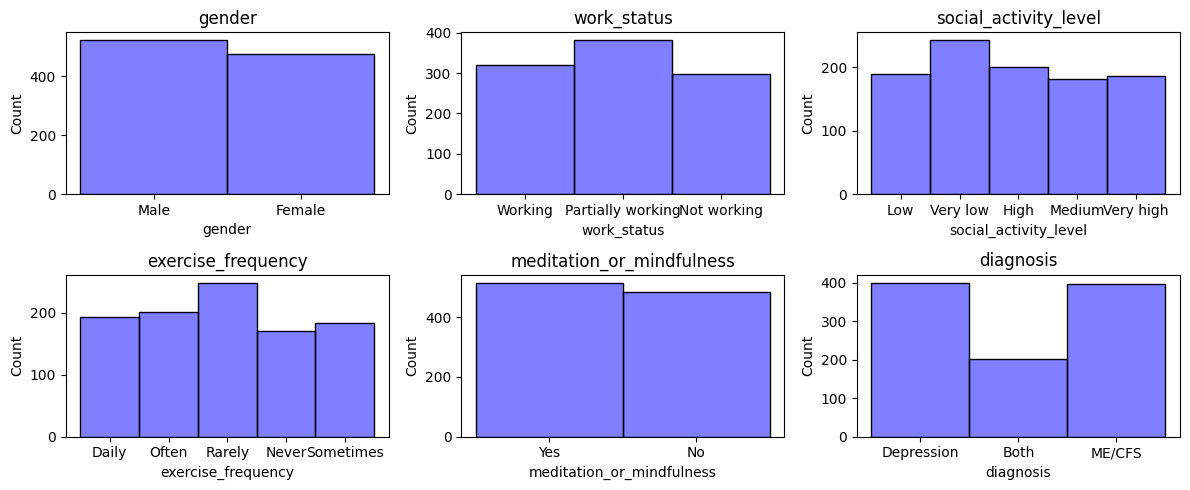

In [13]:
plt.figure(figsize=(12,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    sns.histplot(x=cat_cols[i], data=df_filled, color='blue', alpha=0.5)
    plt.title(cat_cols[i])

plt.tight_layout()
plt.show()

now lets do something similar for numeric value columns!

In [14]:
num_cols = df.select_dtypes(exclude=['object']).columns
num_cols = [col for col in num_cols]
num_cols

['age',
 'sleep_quality_index',
 'brain_fog_level',
 'physical_pain_score',
 'stress_level',
 'depression_phq9_score',
 'fatigue_severity_scale_score',
 'pem_duration_hours',
 'hours_of_sleep_per_night',
 'pem_present']

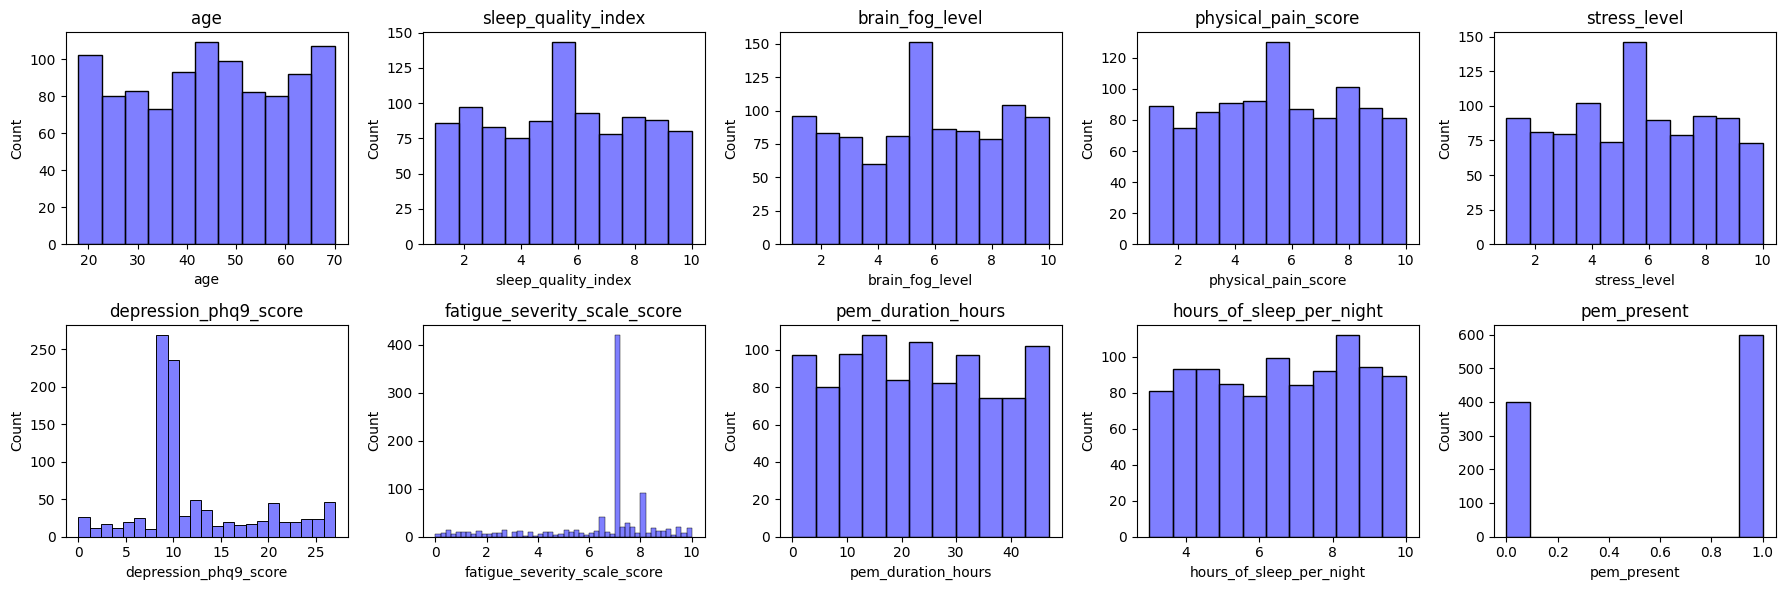

In [15]:
plt.figure(figsize=(18,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    sns.histplot(x=num_cols[i], data=df_filled, color='blue', alpha=0.5)
    plt.title(num_cols[i])

plt.tight_layout()
plt.show()

but for same values, if we do a count plot, we get something like this:

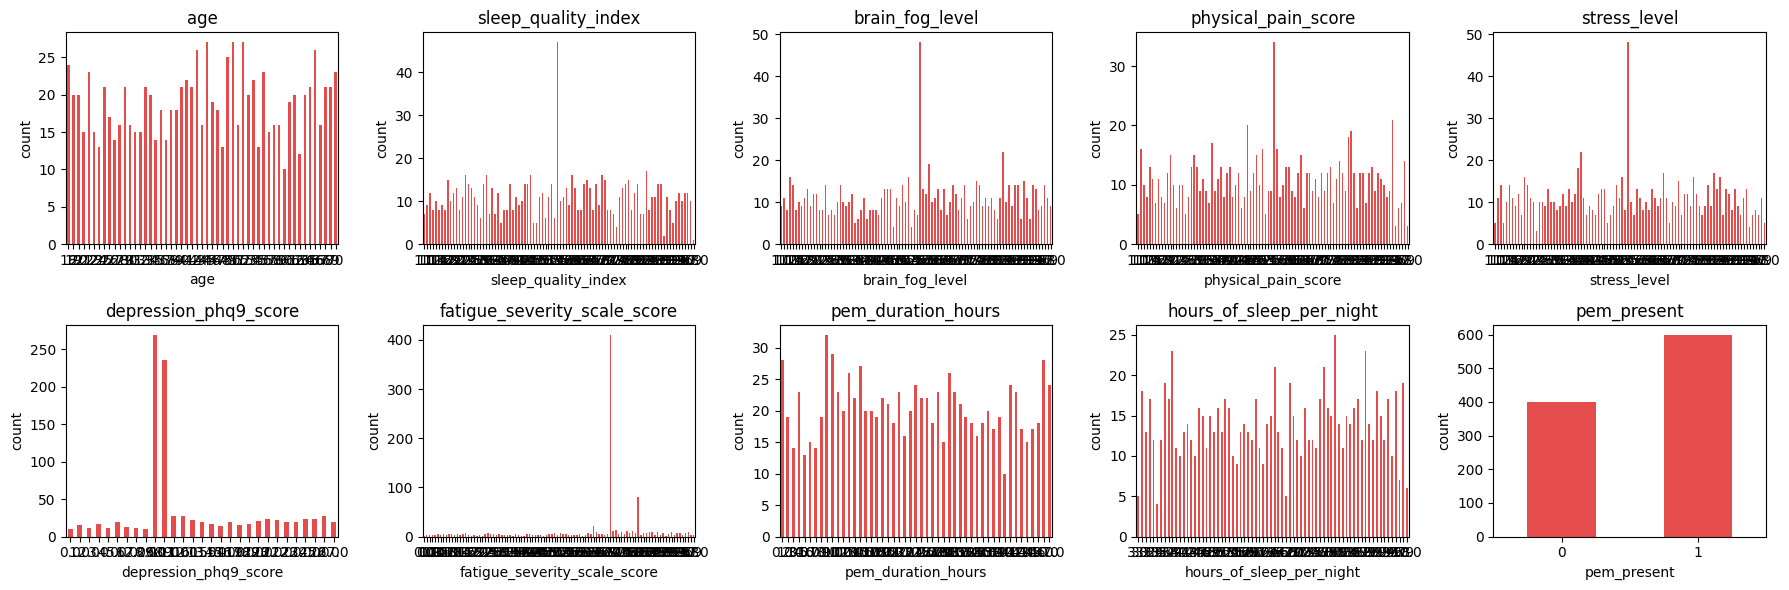

In [16]:
plt.figure(figsize=(18,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    sns.countplot(x=num_cols[i], data=df_filled, color='red', alpha=0.8, width=0.5)
    plt.title(num_cols[i])

plt.tight_layout()
plt.show()

let's observe some data with reference to these graphs

In [17]:
df_filled[cat_cols].describe()

,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
count,1000,1000,1000,1000,1000,1000
unique,2,3,5,5,2,3
top,Male,Partially working,Very low,Rarely,Yes,Depression
freq,524,382,243,249,516,401


In [18]:
df_filled[num_cols].describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.510206,2.584885,2.521426,2.504119,6.236760,2.183618,13.656890,2.018762,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.300000,3.400000,3.500000,3.400000,9.000000,6.400000,12.000000,4.800000,0.000000
50%,45.000000,5.468625,5.611765,5.521843,5.459139,10.000000,7.000000,23.000000,6.585649,1.000000
75%,57.000000,7.600000,7.800000,7.700000,7.600000,15.000000,7.400000,34.250000,8.300000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


## Correlation Matrix

Correlation Matrix shows how much one variable affects other. but to see this, we must put all our data in single Dtype, i.e. `objects` cannot be used to show relationship, hence we must convert them to their numerical counterparts. we can do this with help of encoding.

We will use two primary encoding techniques:
1. `Label Encoding` : work_status, social_activity_level, exercise_frequency
2. `One-Hot Encoding` : gender, meditation_or_mindfullness

In [19]:
df_filled['exercise_frequency'].unique()

array(['Daily', 'Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [20]:
# Label Encoding
work_status_mapping = {'Working': 0, 'Partially working': 1, 'Not working': 2}
social_activity_level_mapping = {'Low': 0, 'Very low': 1, 'Medium': 2, 'High': 3, 'Very high': 4}
exercise_frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Daily': 4}

In [21]:
df_encoded = df_filled

In [22]:
df_encoded['ws_e'] = df_encoded['work_status'].map(work_status_mapping)
df_encoded['sal_e'] = df_encoded['social_activity_level'].map(social_activity_level_mapping)
df_encoded['ef_e'] = df_encoded['exercise_frequency'].map(exercise_frequency_mapping)

now that we have applied label encoding, let's apply one-hot encoding

we can do this by either using scikit-learn's `OneHotEncoder` or pandas' `get_dummies` function

In [23]:
dummies = pd.get_dummies(df_encoded[['gender', 'meditation_or_mindfulness']], drop_first=True)
dummies.head()

,gender_Male,meditation_or_mindfulness_Yes
0,True,True
1,True,True
2,False,True
3,False,True
4,False,False


now we have just one problem, our `diagnosis`, which is our detection variable, is still a string.

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           1000 non-null   float64
 3   brain_fog_level               1000 non-null   float64
 4   physical_pain_score           1000 non-null   float64
 5   stress_level                  1000 non-null   float64
 6   depression_phq9_score         1000 non-null   float64
 7   fatigue_severity_scale_score  1000 non-null   float64
 8   pem_duration_hours            1000 non-null   float64
 9   hours_of_sleep_per_night      1000 non-null   float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   1000 non-null   object 
 12  social_activity_level         1000 non-null   object 
 13  exer

we also have to apply `label encoding` to diagnosis column as it is categorical.

In [26]:
diagnosis_mapping = {'Depression': 0, 'ME/CFS': 1, 'Both': 2}
df_encoded['d_e'] = df_encoded['diagnosis'].map(diagnosis_mapping)

now we have some repititive columns, removing the ones which are unnecessary 

In [27]:
df_updated = df_encoded

In [28]:
df_updated = df_updated.drop([
    'gender',
    'work_status',
    'social_activity_level',
    'exercise_frequency',
    'meditation_or_mindfulness',
    'diagnosis'
], axis=1)

In [29]:
df_updated

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,ws_e,sal_e,ef_e,d_e
0,56,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.700000,0,0,0,4,0
1,69,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.400000,1,0,0,3,2
2,46,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.900000,0,1,1,1,0
3,32,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.500000,0,2,3,0,0
4,60,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.100000,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,8.2,9.2,8.8,3.600000,10.0,6.9,29.0,3.200000,0,1,2,1,0
996,66,9.7,1.3,2.4,2.800000,9.0,7.0,34.0,6.571297,1,0,4,1,1
997,52,8.7,4.2,8.7,3.400000,7.0,7.0,40.0,9.200000,1,0,4,4,1
998,69,2.1,1.1,9.9,2.500000,15.0,3.5,37.0,3.300000,0,1,0,0,0


In [ ]:
df_updated = pd.concat([df_encoded, dummies], axis=1)
df_updated.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,...,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis,ws_e,sal_e,ef_e,d_e,gender_Male,meditation_or_mindfulness_Yes
0,56,Male,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.7,...,Low,Daily,Yes,Depression,0,0,4,0,True,True
1,69,Male,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.4,...,Low,Often,Yes,Both,0,0,3,2,True,True
2,46,Female,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.9,...,Very low,Rarely,Yes,Depression,1,1,1,0,False,True
3,32,Female,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.5,...,High,Never,Yes,Depression,2,3,0,0,False,True
4,60,Female,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.1,...,Low,Rarely,No,Both,2,0,1,2,False,False


<Axes: >

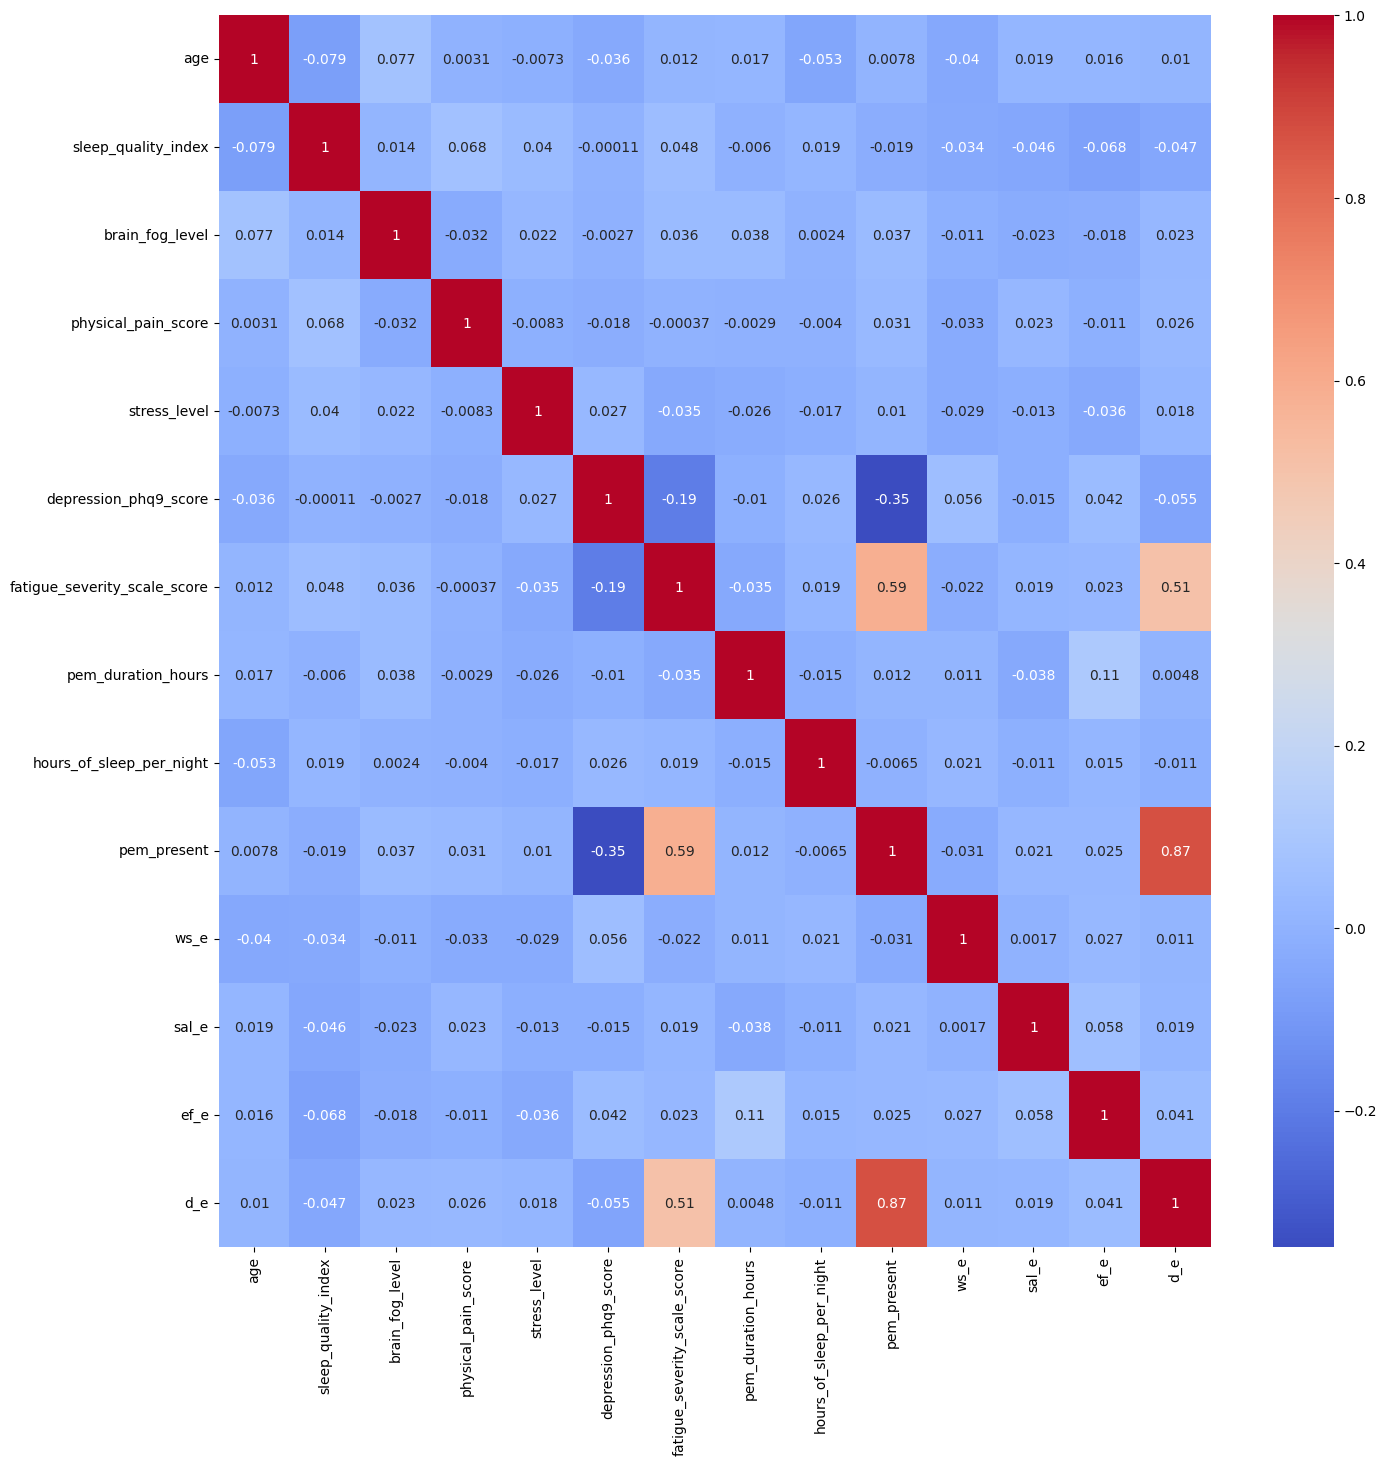

In [35]:
plt.figure(figsize=(16,16))
df_corr = df_updated.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

from the correlation map, we can conclude:
`pem_present`, `fatigue_severity_scale_score` and `depression_phq9_score` are most significant!

In [37]:
df_working = df_updated
df_working

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,ws_e,sal_e,ef_e,d_e
0,56,8.7,3.9,9.2,8.100000,10.0,6.5,9.0,7.700000,0,0,0,4,0
1,69,1.3,9.9,4.2,9.900000,20.0,7.0,41.0,8.400000,1,0,0,3,2
2,46,4.0,5.4,4.8,5.459139,24.0,1.6,13.0,6.900000,0,1,1,1,0
3,32,9.4,2.1,2.9,3.800000,10.0,6.8,11.0,7.500000,0,2,3,0,0
4,60,7.6,7.5,6.4,8.500000,17.0,7.0,46.0,3.100000,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,8.2,9.2,8.8,3.600000,10.0,6.9,29.0,3.200000,0,1,2,1,0
996,66,9.7,1.3,2.4,2.800000,9.0,7.0,34.0,6.571297,1,0,4,1,1
997,52,8.7,4.2,8.7,3.400000,7.0,7.0,40.0,9.200000,1,0,4,4,1
998,69,2.1,1.1,9.9,2.500000,15.0,3.5,37.0,3.300000,0,1,0,0,0


we created a new df i.e. `df_working` so we can work on this one to make, train and validate a model. 

Time for us to select best model for prediction. We can take help from [Best Model Selection Map](https://scikit-learn.org/stable/machine_learning_map.html) to help us better.

<img src="images\ml_map.svg">

from the map, since we have a classification problem, we can try `Linear SVC`, `KNeighbors Classifier`, and `Ensemble Classifiers` and `SVC`.

so lets try them!

In [45]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

In [39]:
# creating a dictonary of models
models = {
    'linearsvc': LinearSVC(),
    'svc': SVC(),
    'knn': KNeighborsClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier()
}

In [61]:
# creating a function to fit (train) and score (evaluate) the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits (trains) and Scores (Evaluation) the entered data on the models
    Saves the model.
    Args:
    models : a dict of different Scikit-Learn ML models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    # set random seed
    np.random.seed(42)

    model_scores = {}

    # loop through models
    for name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)

        # score the model
        model_scores[name] = model.score(X_test, y_test)

        # saving the model
        filename = f"{name}_model.pkl"
        joblib.dump(model, f"models/{filename}")
    
    return model_scores

now let's create some train and test data from what we have!

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_working.drop('d_e', axis=1), df_working['d_e'], test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 13), (200, 13), (800,), (200,))

now that we have train and test data, we can use these to fit (train) and score (test) our model.

In [62]:
# testing the function

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'linearsvc': 0.93,
 'svc': 0.7,
 'knn': 0.625,
 'random_forest': 0.995,
 'gradient_boosting': 0.995}

WOW! from the results it is apparent that Ensemble Classifiers generated the best RESULTS!

since the ensemble classifiers, namely `random forest` and `gradient boosting` are working best, lets do some hyper-parameter tuning for these models.

In [65]:
random_forest = joblib.load('models/random_forest_model.pkl')
gradient_boosting = joblib.load('models/gradient_boosting_model.pkl')

In [66]:
random_forest

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
gradient_boosting

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None
